In [1]:
# Manipulacion de Datos

import numpy as np
import pandas as pd

from scipy import stats

# Visualización de Datos

import matplotlib.pyplot as plt
import seaborn as sns


# Tensorflow (para el ejemplo de las metricas de clasificacion)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Metricas

from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'tensorflow.keras'

# Probabilidad y Estadística en IA

## Conceptos Fundamentales

### ¿Qué es la incertidumbre?

Se refiere a la falta de certeza o predictibilidad completa en los resultados de un evento o experimento y es una consecuencia natural de la variabilidad inherente del mundo real.

### ¿Qué es la precisión?

Se refiere a la calidad y confiabilidad de los analisis y las predicciones. Sin embargo, en la practica, existen desafios que pueden afectar a la precision de resultados.

* Problemas:
  * Datos Ruidosos
  * Cobertura Limitada del Area del problema
  * Modelos Imperfectos

* Estrategias
  * Limpieza de datos
  * Muestreo Representativo
  * Mejora de Modelos

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

### ¿Qué es la expectativa?

La expectativa representa el valor promedio o medio que se espera de una variable aleatoria en un conjunto de posibles resultados.

La fórmula general para calcular la expectativa de una variable aleatoria discreta $X$ es:
$$
\mathbb{E}[X] = \sum_x x \cdot P(X = x) = x_1 p_1 + x_2 p_2 + \ldots + x_n p_n
$$
donde $x$ son los posibles valores de $X$ y $P(X = x)$ es la probabilidad de que $X$ tome el valor $x$.

### ¿Qué es la varianza?

La varianza es una medida de la dispersión o variabilidad de una variable aleatoria.

Indica cuán dispersos están los valores de la variable en torno a su valor esperado (media) y se calcula a través de la siguiente fórmula:
$$
\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]
$$
donde $\mathbb{E}[X]$ es el valor esperado de $X$. Esta fórmula representa la media de los cuadrados de las diferencias entre cada valor de $X$ y su valor esperado.

### ¿Qué es la covarianza?

La covarianza es una medida que cuantifica la relación lineal entre dos variables aleatorias e indica si las dos variables tienden a aumentar o disminuir juntas.

Una covarianza positiva indica una relación directa, mientras que una covarianza negativa indica una relación inversa, y se calcula tal que:
$$
\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$
donde $\mathbb{E}[X]$ y $\mathbb{E}[Y]$ son los valores esperados de $X$ e $Y$ respectivamente.

**Ejercicio:**

Supongamos que trabajamos para una Aseguradora que solo cubre daños debidos a un desastre natural, cuya probabilidad de suceder en un año la compañía estima en 0.01 (o 1%). Si un desastre ocurre, la compañía tendrá que pagar $100,000 en daños.

Calcule:
1. **El pago esperado (o coste para la compañía):**
   La fórmula para calcular el pago esperado es:
   $$
   \mathbb{E}[X] = \sum_x x \cdot P(X = x) = x_1 p_1 + x_2 p_2 + \ldots + x_n p_n
   $$
   donde $x_1 = 100,000$, $p_1 = 0.01$ y $x_2 = 0$, $p_2 = 0.99$.

2. **La varianza:**
   La varianza se calcula como:
   $$
   \text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]
   $$
   donde $\mathbb{E}[X]$ es el valor esperado de $X$.

### ¿Qué es el Z-Score?

$$
z = \frac{x - \mu}{\sigma}
$$
donde:
- $z$ es el Z-Score.
- $x$ es el valor que se está evaluando.
- $\mu$ es la medida del conjunto de datos.
- $\sigma$ es la desviación estándar del conjunto de datos.

In [ ]:
# Generamos el set de datos
np.random.seed(0)
sample_size = 100
hours_studied = np.random.uniform(0, 10, sample_size)
marks_obtained = 50 + (hours_studied * 5) + np.random.normal(0, 10, sample_size)  # Añadir ruido para que nos sirva al calcular la distribucion
df = pd.DataFrame({'Hours_Studied': hours_studied, 'Test_Score': marks_obtained})

# Mostramos los datos
plt.scatter(df['Hours_Studied'], df['Test_Score'], alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title('Hours Studied vs Test Score')
plt.show()

# Calculamos los valores esperados, varianza y covarianza
expected_hours = np.mean(hours_studied)
expected_marks = np.mean(marks_obtained)
variance_hours = np.var(hours_studied)
variance_marks = np.var(marks_obtained)
covariance = np.cov(hours_studied, marks_obtained)[0, 1]

print(f"Expected Hours Studied: {expected_hours}")
print(f"Expected Marks Obtained: {expected_marks}")
print(f"Variance in Hours Studied: {variance_hours}")
print(f"Variance in Marks Obtained: {variance_marks}")
print(f"Covariance between Hours Studied and Marks Obtained: {covariance}")

# Representamos los datos en un histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(hours_studied, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(marks_obtained, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Marks Obtained')
plt.xlabel('Marks Obtained')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculamos Z-Score
mean_marks = np.mean(marks_obtained)
std_marks = np.std(marks_obtained)
z_scores_marks = (marks_obtained - mean_marks) / std_marks

# Mostramos la distribucion de Z-Scores en un histograma
plt.figure(figsize=(8, 6))
plt.hist(z_scores_marks, bins=10, color='purple', alpha=0.7)
plt.title('Histogram of Z-scores for Marks Obtained')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

### ¿Qué es la entropía?

La entropía es una medida fundamental en la teoría de la información y se utiliza para cuantificar la cantidad promedio de sorpresa o incertidumbre en una distribución de probabilidad. Cuanto más incierta sea una distribución, mayor será su entropía.

## Reglas y Teoremas Esenciales de Probabilidad

### Regla Suma

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

### Regla Producto

$$
P(A \cap B) = P(A) \times P(B)
$$

### Teorema de Bayes

$$
P(A \mid B) = \frac{P(B \mid A) \times P(A)}{P(B)}
$$

donde:
- $P(A \mid B)$ es la probabilidad posterior de $A$ dado $B$.
- $P(B \mid A)$ es la probabilidad de $B$ dado $A$.
- $P(A)$ y $P(B)$ son las probabilidades marginales de $A$ y $B$ respectivamente.

**Ejercicio:**

Supongamos que en un hospital se ha empezado a utilizar una nueva prueba para detectar una enfermedad rara llamada Enfermitis. La Enfermitis afecta al 1% de la población $(P(\text{Enfermitis}) = 0.01)$. La prueba tiene las siguientes características después de haberla probado con miles de pacientes:
- La probabilidad de que la prueba dé positivo cuando el paciente realmente tiene la enfermedad $(P(\text{Positivo}|\text{Enfermitis}))$ es del 98%.
- La probabilidad de que la prueba dé positivo cuando el paciente no tiene la enfermedad $(P(\text{Positivo}|\text{No Enfermitis}))$ es del 2%.

Se le realiza la prueba a un paciente y el resultado es positivo. ¿Cuál es la probabilidad de que el paciente realmente tenga la enfermedad, dado que la prueba ha salido positiva $(P(\text{Enfermitis}|\text{Positivo}))$?

**Solución:**

In [23]:
p_enfermitis = 0.01
p_posit_enfermitis = 0.98
p_posit_no_enfermitis = 0.02

p_posit = p_posit_enfermitis*p_enfermitis + p_posit_no_enfermitis*(1-p_enfermitis)

p_enfermitis_posit = p_posit_enfermitis*p_enfermitis/p_posit

print("La probabilidad de que el paciente realmente tenga la enfermedad, dado que la prueba ha salido positiva: ", p_enfermitis_posit)


La probabilidad de que el paciente realmente tenga la enfermedad, dado que la prueba ha salido positiva:  0.33108108108108103


## Métricas de Evaluación para Clasificadores

### ¿Qué es la matriz de confusión:

La **matriz de confusión** es una herramienta que se utiliza frecuentemente en el aprendizaje supervisado para medir la calidad de los modelos de clasificación. Esta matriz es especialmente útil para evaluar el desempeño de un clasificador en tareas con dos o más categorías. Presenta un resumen de los resultados de predicción de un problema de clasificación de forma que es posible comparar visualmente el número de predicciones correctas e incorrectas.

* Componentes de la Matriz

La matriz de confusión es una tabla donde cada columna representa las instancias en una clase predicha, mientras que cada fila representa las instancias en una clase real. Aquí te muestro cómo se organiza generalmente:

- **Verdaderos positivos (VP)**: El modelo predijo correctamente la clase positiva.
- **Falsos positivos (FP)**: El modelo predijo incorrectamente como positiva una clase que es negativa.
- **Verdaderos negativos (VN)**: El modelo predijo correctamente la clase negativa.
- **Falsos negativos (FN)**: El modelo predijo incorrectamente como negativa una clase que es positiva.

*  Formato de la Matriz

En caso binario, la matriz de confusión generalmente se ve así:

|                     | Predicho Positivo | Predicho Negativo |
|---------------------|-------------------|-------------------|
| **Real Positivo**   | Verdaderos Positivos (VP)  | Falsos Negativos (FN)  |
| **Real Negativo**   | Falsos Positivos (FP)      | Verdaderos Negativos (VN) |

### ¿Qué es la precisión? ¿Cómo se calcula?

$$
Precision = \frac{(TP + TN)}{(TP + FP + TN + FN)}
$$

### ¿Qué es la sensibilidad? ¿Cómo se calcula?

$$
Sensibilidad = \frac{TP}{(TP + FN)}
$$

### ¿Qué es la especificidad? ¿Cómo se calcula?

$$
Especificidad = \frac{TN}{(TN + FP)}
$$

### ¿Qué es la precisión positiva? ¿Cómo se calcula?

$$
Positive Predictive Value = \frac{TP}{(TP + FP)}
$$

### ¿Qué es la precisión negativa? ¿Cómo se calcula?

$$
Negative Predictive Value = \frac{TN}{(TN + FN)}
$$

### ¿Qué es el F1 Score?

$$
F1 Score = 2 \times \frac{Precision \times Sensibilidad}{Precision + Sensibilidad}
$$

**Ejercicio:** Continuando el ejercicio anterior…
* Calcula la Precisión, Sensibilidad, Especificidad, Precisión Positiva y Precisión Negativa.
* Implementa una función en Python que acepte una matriz de confusión y calcule el F1 Score.

|                  | Valor              |
|------------------|--------------------|
| Verdaderos Positivos (VP) | 78       |
| Falsos Positivos (FP)     | 12       |
| Verdaderos Negativos (VN) | 135      |
| Falsos Negativos (FN)     | 28       |

In [27]:
VP = 78
FP = 12
VN = 135
FN = 28

Precision = (VP+VN)/(VP+FP+VN+FN)
Sensibilidad = VP/(VP+FN)
Especificidad = VN/(VN+FP)
PPV = VP/(VP+FP)
NPV =VN/(VN+FN)

F1SCORE =2*Precision*Sensibilidad/(Precision+Sensibilidad)

print("Precision: ", Precision, "Sensibilidad: ", Sensibilidad, "Especificidad: ", Especificidad, "PPV: ", PPV, "NPV: ", NPV, "F1 Score: ", F1SCORE)


Precision:  0.841897233201581 Sensibilidad:  0.7358490566037735 Especificidad:  0.9183673469387755 PPV:  0.8666666666666667 NPV:  0.8282208588957055 F1 Score:  0.785309132161089


**Ejemplo:**

In [43]:

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Cargamos el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalizamos las imagenes para que todas tengan el mismo tamaño
train_images, test_images = train_images / 255.0, test_images / 255.0

# Empleamos una CNN de ejemplo
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the output to feed into a dense layer
    Flatten(),
    
    # Dense (fully connected) layer
    Dense(64, activation='relu'),

    # Output layer with 10 neurons for multi-class classification
    Dense(10, activation='softmax')
])

# Configuramos el optimizador con una tasa de aprendizaje data
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 0.1
# 0.01
# 0.001

# Compilamos nuestro modelo
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Entrenamos el modelo
model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))
#model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
#model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
#model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

print(model.metrics_names)

# Evaluamos las predicciones del modelo
scores = model.evaluate(test_images, test_labels)
print(f"Test Loss: ",scores[0])
print(f"Test Accuracy: ",scores[1])

NameError: name 'Sequential' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


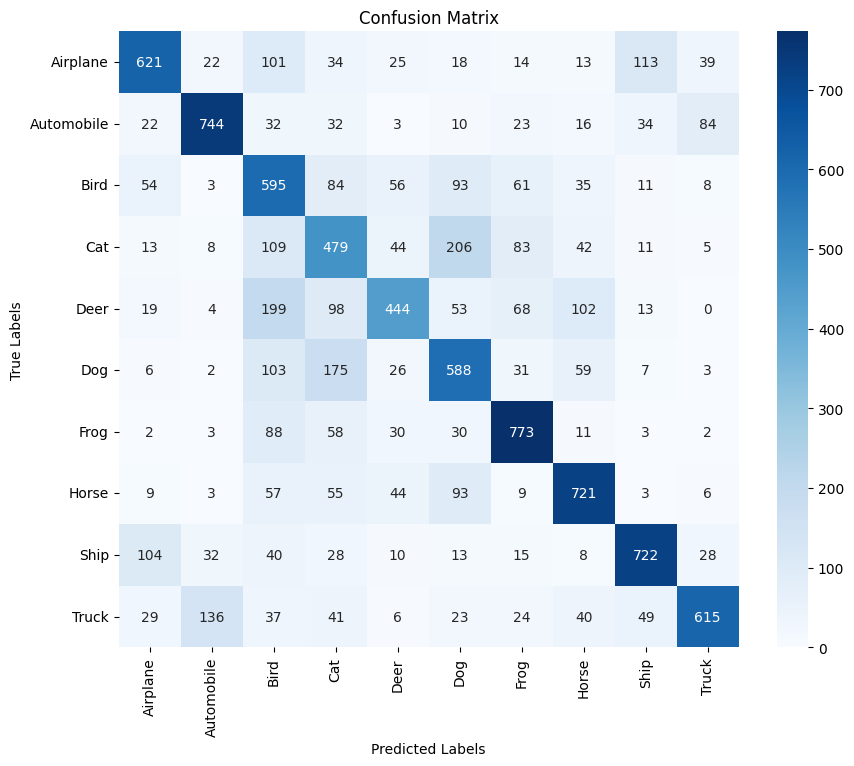

In [4]:
# Empleando el dataset de test, realizamos nuestras predicciones
predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_labels.flatten()

# Creamos nuestra matriz de Confusion
cm = confusion_matrix(true_labels, predicted_labels)

# Mostramos la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [5]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

    Airplane       0.71      0.62      0.66      1000
  Automobile       0.78      0.74      0.76      1000
        Bird       0.44      0.59      0.50      1000
         Cat       0.44      0.48      0.46      1000
        Deer       0.65      0.44      0.53      1000
         Dog       0.52      0.59      0.55      1000
        Frog       0.70      0.77      0.74      1000
       Horse       0.69      0.72      0.70      1000
        Ship       0.75      0.72      0.73      1000
       Truck       0.78      0.61      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



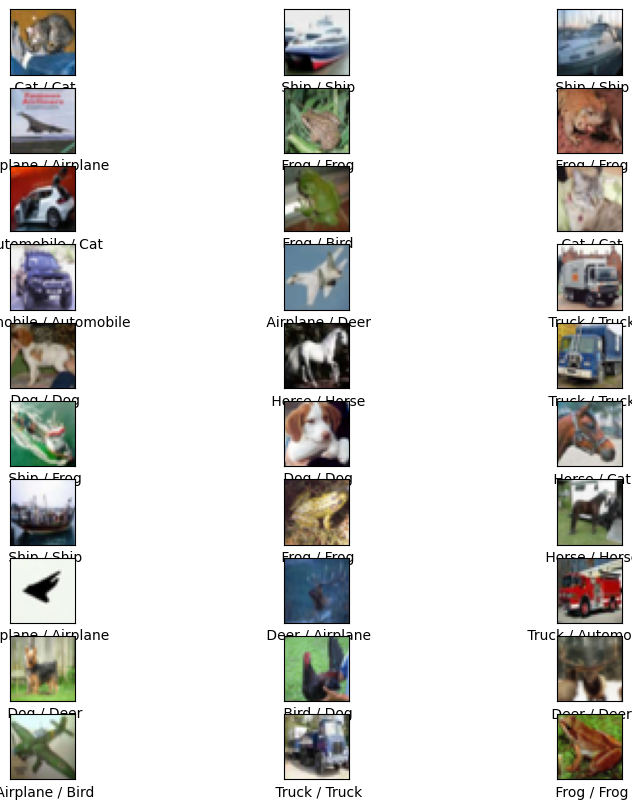

In [6]:
def display_sample_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    
    for i in range(30):
        plt.subplot(10, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # True vs. Predicted
        plt.xlabel(f" {class_names[true_labels[i][0]]} / {class_names[predicted_labels[i]]}")
    plt.show()

# Mostramos las predicciones
display_sample_predictions(test_images, test_labels, predicted_labels)

### ¿Qué ocurre si tenemos que priorizar una característica sobre otra? Analicemos el F𝜷 Score

La fórmula para calcular el F𝛽 Score, que es una medida que combina la precisión y la sensibilidad ponderando uno de estos dos aspectos según el valor de beta (𝛽) elegido, es:

$$
F_{\beta} = (1 + \beta^2) \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\beta^2 \cdot \text{Precisión} + \text{Sensibilidad}}
$$

Este score se ajusta para dar más importancia a la sensibilidad o a la precisión según el valor de 𝛽. Un 𝛽 mayor que 1 da más peso a la sensibilidad, lo que es útil en situaciones donde los falsos negativos llevan un costo más alto que los falsos positivos.

**Ejercicio:**

Supongamos que estamos evaluando el rendimiento de un nuevo kit de prueba de COVID-19. El F𝛽 Score es una medida que combina la precisión y la sensibilidad ponderando uno de estos dos aspectos según el valor de beta que elijamos.

- **Verdaderos Positivos (VP)**: 80 (casos donde la prueba detectó correctamente COVID-19)
- **Falsos Positivos (FP)**: 20 (casos donde la prueba indicó COVID-19 pero era incorrecto)
- **Verdaderos Negativos (VN)**: 150 (casos donde la prueba detectó correctamente la ausencia de COVID-19)
- **Falsos Negativos (FN)**: 10 (casos donde la prueba no detectó COVID-19 pero estaba presente)

¿Qué valor de 𝛽 deberíamos tomar para que las predicciones de nuestros test reduzcan lo máximo posible los Falsos Negativos?

**Solución:**
Estamos evaluando el rendimiento de un nuevo kit de prueba de COVID-19 y deseamos determinar el valor adecuado de 𝛽 que minimice los Falsos Negativos. El F𝛽 Score es una métrica que combina la precisión y la sensibilidad, ponderando uno de estos aspectos más que el otro según el valor de 𝛽.

* Datos:
  - Verdaderos Positivos (VP): 80 (casos donde la prueba detectó correctamente COVID-19)
  - Falsos Positivos (FP): 20 (casos donde la prueba indicó COVID-19 pero era incorrecto)
  - Verdaderos Negativos (VN): 150 (casos donde la prueba detectó correctamente la ausencia de COVID-19)
  - Falsos Negativos (FN): 10 (casos donde la prueba no detectó COVID-19 pero estaba presente)

* Definiciones:
  - **Precisión**: $\frac{VP}{VP + FP}$
  - **Sensibilidad (Recall)**: $\frac{VP}{VP + FN}$
  - **Fórmula del F𝛽 Score**: $F_\beta = (1 + \beta^2) \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\beta^2 \cdot \text{Precisión} + \text{Sensibilidad}}$

* Objetivo:
Deseamos maximizar la sensibilidad para minimizar los Falsos Negativos. Incrementar 𝛽 aumenta la importancia de la sensibilidad. Por lo tanto, evaluaremos cómo varía el F𝛽 Score con diferentes valores de 𝛽 para encontrar un equilibrio adecuado.

* Cálculo del F𝛽 Score:
Ejecutaremos un código que calculará el F𝛽 Score para valores de 𝛽 desde 1 hasta 10. Observaremos cómo el valor del F𝛽 Score cambia con diferentes valores de 𝛽, lo que nos ayudará a decidir cuál valor maximiza la sensibilidad y por ende reduce los Falsos Negativos.

Elegir un valor de 𝛽 significativamente mayor que 1 puede ser beneficioso si el objetivo es minimizar los Falsos Negativos, aunque es crucial considerar el contexto específico de uso de la prueba y el equilibrio deseado entre precisión y sensibilidad.

## Distribuciones Estadísticas

### ¿Qué es una distribución estadística?

Una distribución probabilística una descripción matemática de las posibles ocurrencias de un evento o variable aleatoria y las probabilidades asociadas con cada una de estas ocurrencias.

In [35]:
n_binomial, p_binomial = 10, 0.5
a_uniform_continuous, b_uniform_continuous = 2, 8
a_uniform_discrete, b_uniform_discrete = 2, 8
lambda_poisson = 4
mu_normal, sigma_normal = 0, 1
lambda_exponential = 1

sample_size = 1000
binomial_data = np.random.binomial(n_binomial, p_binomial, sample_size)
uniform_continuous_data = np.random.uniform(a_uniform_continuous, b_uniform_continuous, sample_size)
uniform_discrete_data = np.random.randint(a_uniform_discrete, b_uniform_discrete + 1, sample_size)
poisson_data = np.random.poisson(lambda_poisson, sample_size)
normal_data = np.random.normal(mu_normal, sigma_normal, sample_size)
exponential_data = np.random.exponential(1/lambda_exponential, sample_size)

### Distribución Binomial

Modela el número de éxitos (eventos de éxito) en un número fijo de ensayos independientes idénticos, donde cada ensayo tiene dos resultados posibles: éxito o fracaso.

Ejemplos:
* Lanzamiento de una Moneda Justa Repetidamente
* Prueba de Éxito en Producción
* Probabilidad de Encestar Tiros Libres

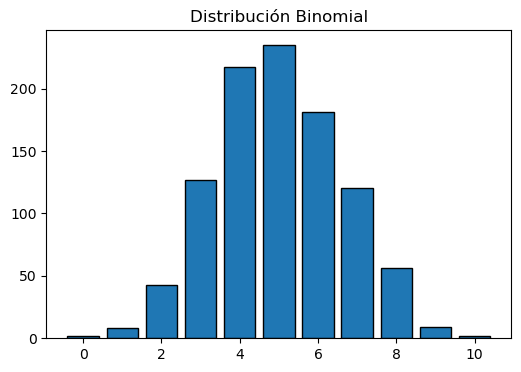

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(binomial_data, bins=np.arange(n_binomial + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title("Distribución Binomial")
plt.show()

### Distribución Normal

Se caracteriza por su forma de campana y es aplicable en una amplia variedad de situaciones debido a su propiedad de ser simétrica y tener una media y una desviación estándar bien definidas.

Ejemplos:
* Altura de Individuos
* Puntajes de Examen
* Errores de Medición

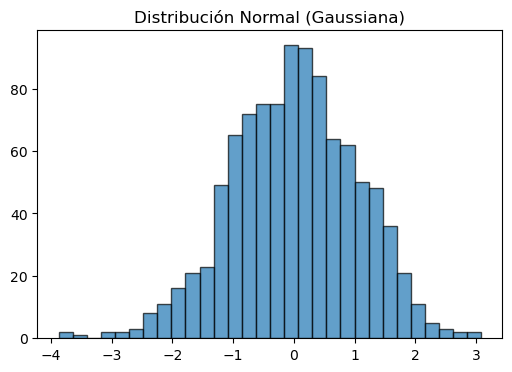

In [41]:
plt.figure(figsize=(6, 4))
plt.hist(normal_data, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribución Normal (Gaussiana)")
plt.show()

### Distribución de Poisson

Modela la ocurrencia de eventos raros en un intervalo fijo de tiempo o espacio.
 
Ejemplos:
* Llamadas a una Línea de Atención al Cliente
* Errores de Tipeo en un Documento
* Llegada de Correos Electrónicos

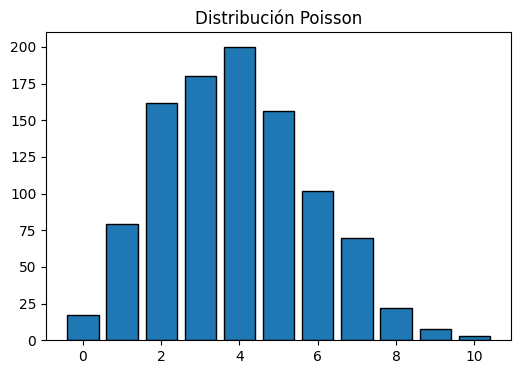

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(poisson_data, bins=np.arange(poisson_data.max() + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title("Distribución Poisson")
plt.show()

### Distribución Uniforme Continua

Ejemplos:
* Selección Aleatoria en un Intervalo
* Tiempo de Espera Aleatorio

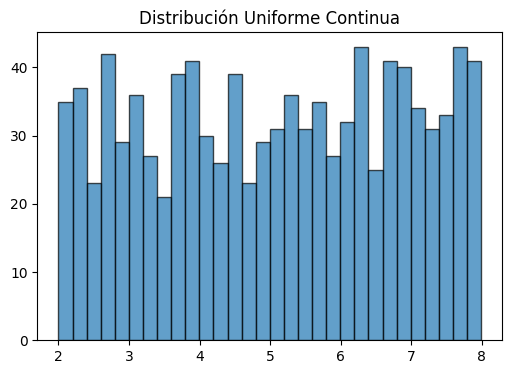

In [11]:
plt.figure(figsize=(6, 4))
plt.hist(uniform_continuous_data, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribución Uniforme Continua")
plt.show()

### Distribución Uniforme Discreta

Ejemplos:
* Lanzamiento de un Dado
* Selección Aleatoria de Elementos

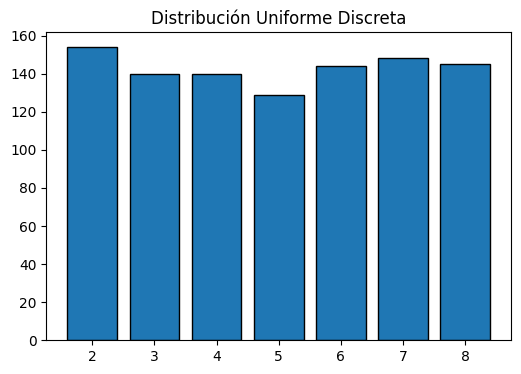

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(uniform_discrete_data, bins=np.arange(a_uniform_discrete, b_uniform_discrete + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title("Distribución Uniforme Discreta")
plt.show()

### Distribución Exponencial

Modelar el tiempo entre eventos sucesivos en un proceso de Poisson.

Ejemplos:
* Tiempo entre Llegadas de Clientes
* Tiempo de Espera en una Cola
* Duración de Llamadas Telefónicas

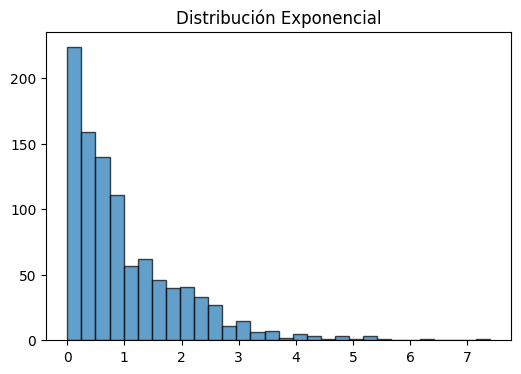

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(exponential_data, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribución Exponencial")
plt.show()

### ¿Cómo podemos chequear el ajuste de un conjunto de datos a una distribución estadística?

   Height (cm)
0   187.640523
1   174.001572
2   179.787380
3   192.408932
4   188.675580


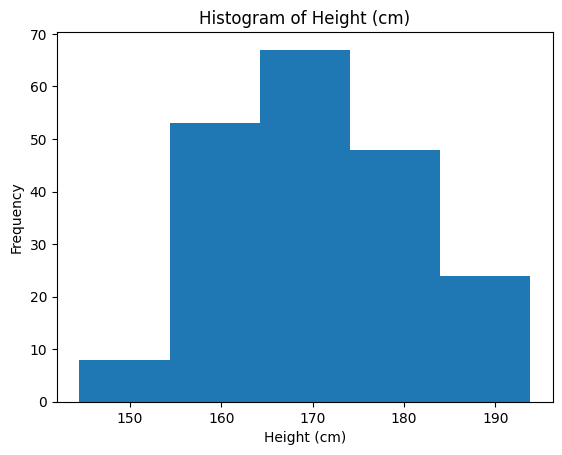

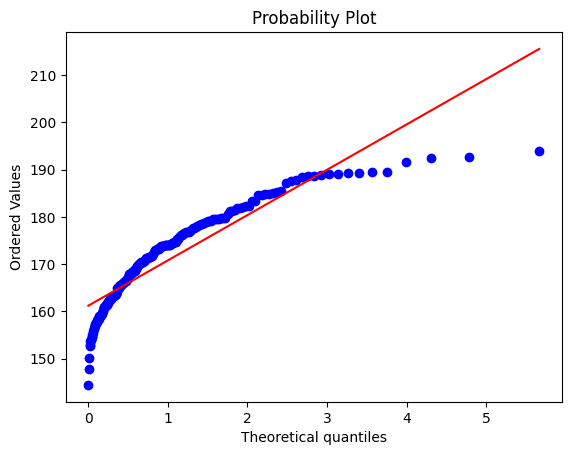

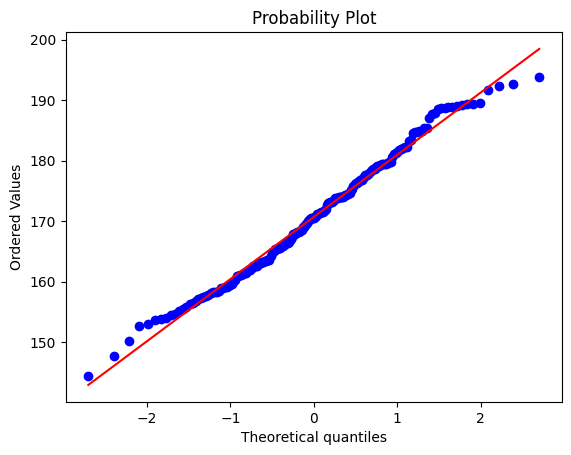

In [14]:
file_path = 'heights_data.csv'

column_name = 'Height (cm)'

data = pd.read_csv(file_path)

print(data.head())

plt.hist(data[column_name], bins=5)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

qqdata = data['Height (cm)'].to_numpy()

# Distributions

#'norm': Normal (Gaussian) distribution.
#'uniform': Uniform distribution.
#'t': Student's t-distribution.
#'logistic': Logistic distribution.
#'expon': Exponential distribution.
#'gumbel': Gumbel distribution (often used for modeling extreme values).
#'cauchy': Cauchy distribution.
#'weibull_min', 'weibull_max': Weibull minimum and maximum extreme value distributions.
#'pareto': Pareto distribution.

stats.probplot(qqdata, dist="expon", plot=plt)
plt.show()

stats.probplot(qqdata, dist="norm", plot=plt)
plt.show() 